In [2]:
# The necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Missing values in numeric columns:
 Unique ID           0
Indicator ID        0
Geo Join ID         9
Data Value          0
Message         18025
dtype: int64
Numeric data after feature engineering:
    Unique ID  Indicator ID  Geo Join ID  Data Value  Year  Month  \
0     179772           640        409.0         0.3  2015      1   
1     179785           640        209.0         1.2  2015      1   
2     178540           365        209.0         8.6  2011     12   
3     178561           365        409.0         8.0  2011     12   
4     823217           365        409.0         6.1  2022      6   

   Geo Join Ratio  
0        0.000692  
1        0.000354  
2        0.000354  
3        0.000692  
4        0.000692  
Number of features: 7


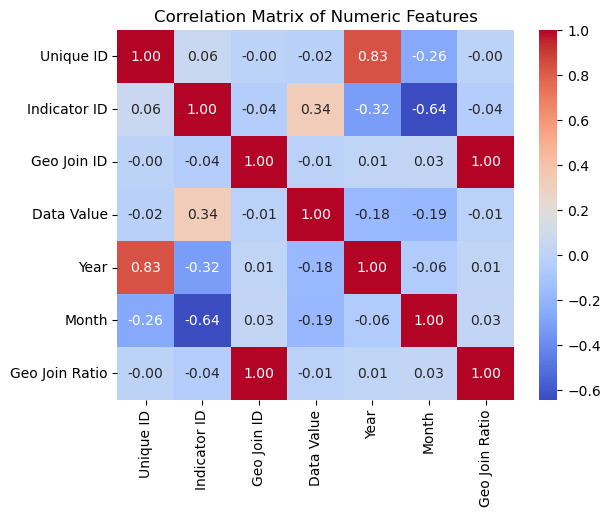

In [3]:
# Load the dataset
data = pd.read_csv("Air_Quality.csv")

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Check for missing values in numeric columns
print("Missing values in numeric columns:\n", numeric_data.isnull().sum())

# Fill missing values in numeric columns with the mean
numeric_data = numeric_data.fillna(numeric_data.mean())

# Drop columns with no variance (constant columns)
numeric_data = numeric_data.loc[:, numeric_data.var() > 0]

# Feature engineering: Adding new features
data['Year'] = pd.to_datetime(data['Start_Date']).dt.year  # Extract year from Start_Date
data['Month'] = pd.to_datetime(data['Start_Date']).dt.month  # Extract month from Start_Date
data['Geo Join Ratio'] = data['Geo Join ID'] / (data['Geo Join ID'].mean() + 1)  # Example ratio feature

# Merge new features into numeric_data
numeric_data['Year'] = data['Year']
numeric_data['Month'] = data['Month']
numeric_data['Geo Join Ratio'] = data['Geo Join Ratio']

# Ensure at least 5 features
print("Numeric data after feature engineering:\n", numeric_data.head())
print("Number of features:", numeric_data.shape[1])

# Compute and visualize the correlation matrix
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [4]:
# Check if the target column exists
target_column = "Data Value"  # Replace with the actual target column name
if target_column not in numeric_data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

# Separate features and target
features = numeric_data.drop(columns=[target_column])
target = numeric_data[target_column]

# Handle missing values
features = features.fillna(features.mean())

# Verify no NaNs remain
if features.isnull().any().any():
    raise ValueError("NaN values remain in features after imputation.")

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.2, random_state=42
)

# Model training
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.6923951962319552
MSE: 167.10762423344931


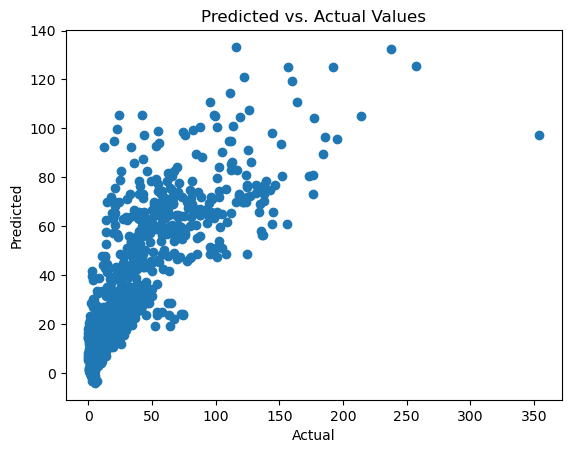

In [5]:
# Plot predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual Values")
plt.show()